In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn import linear_model

from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import BernoulliNB

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from mpl_toolkits import mplot3d


In [2]:
warnings.filterwarnings('ignore')

## Open food facts project

### Objectives

We live in a world where obesity, diabetes and food affections are growing rapidly. Diet is a major topic for the world’s future. This project aims to contribute to healthier and more sustainable diet. In this project, we will apply machine learning algorithms to analyse the nutrient factors for products available in open food facts data set and make recommendations for healthier alternatives.

### Design 
Open food facts is a food product database with ingredients, allergens, nutrition facts and all other information we find on food product labels. Open Food Facts data has 163 Variables and 1 million records. We have both categorial and numerical variables. Using analytical methods, we aim to provide useful insights from that huge data source.

### Methods and Analysis

- Exploratory data analysis to comparenutrition values for vegan and non-vegan products. (US data)
- Feature selection and Feature engineering
- Categorization of food procts based on fat, protein, carb and calorie (only food lion data subset)
- Clustering of food products (only food lion data subset)
- Regression to predict nutrition score. Nutri-Score has been proposed by EREN, a French public nutrition research team, led by Professor Serge Hercberg. It is based on the FSA nutritional score created by the Food Standards Agency in the UK.
- Classification machine learning algorithms to predict nutrition grade score ( France)

### Challenges and limitation of the study:
- Although there are many features in the dataset, around 60 percent of the features contain more than 80 percent missing values which makes it difficult to include those features for analysis.
- Quantity is ranged over various units and sometimes contain text description not very clearly, making it difficult to extract information.
- there might be large discrepancies between the reported nutrients and the actual food content, due to different factors, such as food pre-processing or the different industry standards.


**What is estimator of nutrition score**

Nutri-Score has been proposed by EREN, a **French public nutrition research** team, led by Professor **Serge Hercberg**. It is based on the FSA nutritional score created by the Food Standards Agency in the UK

**Loading Data**

In [3]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep = '\t')
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check dimension of data

In [4]:
df.shape

(356027, 163)

Data has 356027 rows and 163 columns

Now we want to check features with more than 80 % missing values

### Data prepation

Text(0, 0.5, 'Variables')

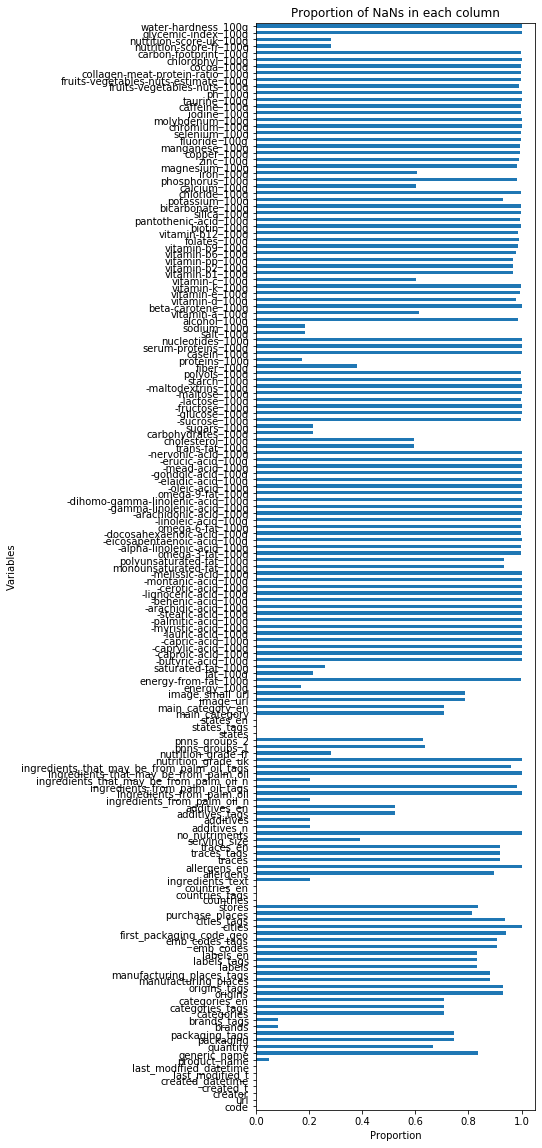

In [5]:
plt.figure(figsize=(5, 20))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")
plt.xlabel('Proportion')
plt.ylabel('Variables')

For the majority of products we don't know nutrition columns (with "100g" in the columns name). We see that around 70 % features have more than 80 % missing value. In this analysis, we will drop the features having more than 80% missing values.

In [6]:
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.80].index
#df.drop(missing_features, axis=1, inplace=True)
missing_features

Index(['generic_name', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags',
       ...
       'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g',
       'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'glycemic-index_100g', 'water-hardness_100g'],
      dtype='object', length=109)

deleting features containg more than 80 percent missing values

In [7]:
df_selected = df.drop(missing_features, axis=1, inplace=False)

Now, check the remaining features available in data

In [8]:
df_selected.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 

There are many NaN values in data. We want to remove rows containg NaN values while doing exploratory analysis in data.

Function to select rows without NaNs

In [9]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

There are a lot of text columns representing comma separated list of texts. We need a function to split rows with multiple values to several rows (source)

In [10]:
def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

**Which countries are represented in a dataset?**

In [11]:
countries=df_selected['countries_en'].value_counts().head(10).to_frame()
s = countries.style.background_gradient(cmap='Blues')
s

,countries_en
United States,173159
France,123961
Switzerland,14932
Germany,8470
Spain,5529
United Kingdom,5092
Belgium,2936
Australia,2201
Russia,1582
"France,Switzerland",1492


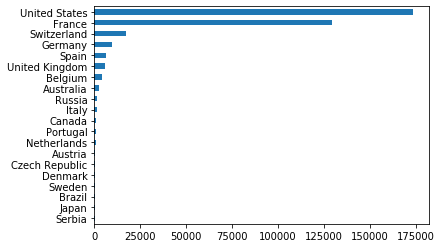

In [12]:
food_countries = splitDataFrameList(no_null_objects(df_selected, ["countries_en"]), "countries_en", ",")
countries = food_countries["countries_en"].value_counts()
countries[:20][::-1].plot.barh()

**Proportion of NaN values in each column**

Text(0, 0.5, 'Variables')

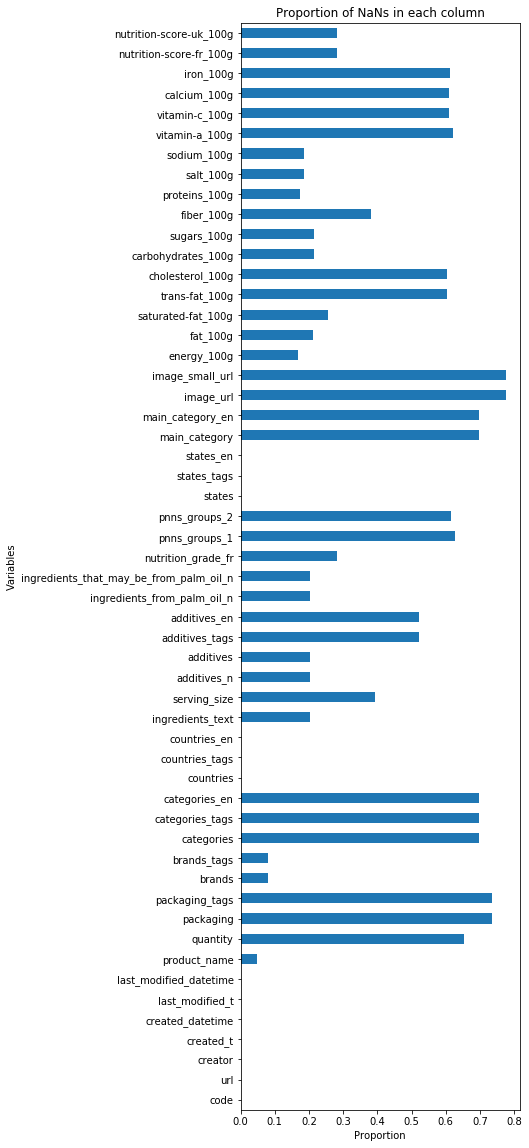

In [13]:
plt.figure(figsize=(5, 20))
food_countries.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")
plt.xlabel('Proportion')
plt.ylabel('Variables')

We want to run our initial analysis on subset of data. Taking subset of only US records

In [14]:
df_US = food_countries[food_countries['countries']== "US"]

checking the dimension of food records of US

In [15]:
df_US.shape

(169789, 54)

Text(0, 0.5, 'variables')

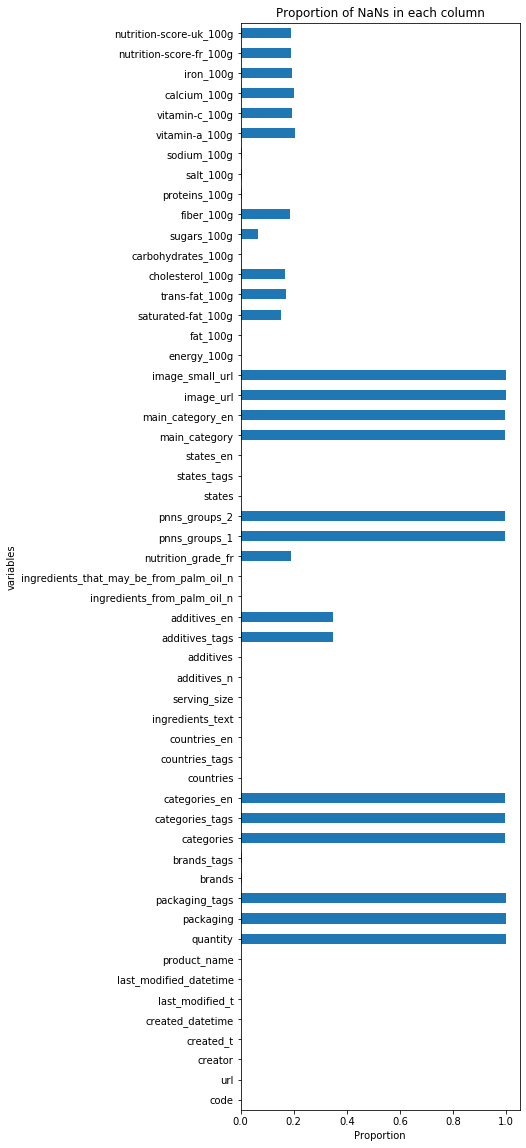

In [16]:
plt.figure(figsize=(5, 20))
df_US.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")
plt.xlabel('Proportion')
plt.ylabel('variables')

In [17]:
pct_null = df_US.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.80].index
#df.drop(missing_features, axis=1, inplace=True)
missing_features

Index([], dtype='object')

In [18]:
#df_US.head()

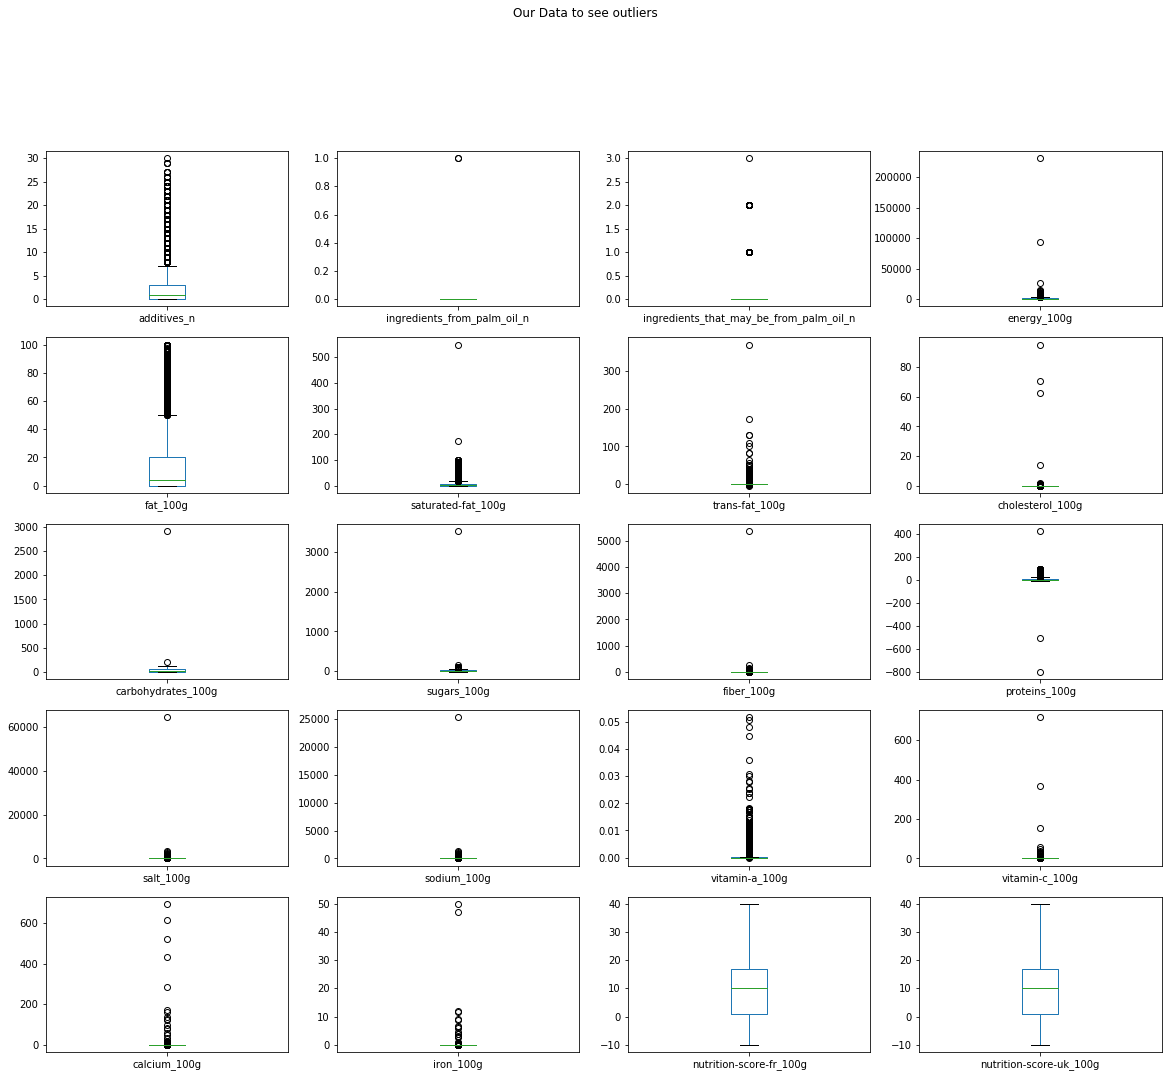

In [19]:
df_US.select_dtypes(include=float).plot(kind='box', subplots=True, title='Our Data to see outliers', figsize=(20,20), layout=(6,4))

plt.show()

In [20]:
df_US.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 

In [21]:
#We eliminate all values (outliers) that are more than 4 std's from the mean
df_US = df_US[np.abs(df_US['additives_n']-df_US['additives_n'].mean())<=(4*df_US['additives_n'].std())]
df_US = df_US[np.abs(df_US['energy_100g']-df_US['energy_100g'].mean())<=(4*df_US['energy_100g'].std())]
df_US = df_US[np.abs(df_US['fat_100g']-df_US['fat_100g'].mean())<=(4*df_US['fat_100g'].std())]
df_US = df_US[np.abs(df_US['ingredients_from_palm_oil_n']-df_US['ingredients_from_palm_oil_n'].mean())<=(4*df_US['ingredients_from_palm_oil_n'].std())]
df_US = df_US[np.abs(df_US['trans-fat_100g']-df_US['trans-fat_100g'].mean())<=(4*df_US['trans-fat_100g'].std())]
df_US = df_US[np.abs(df_US['cholesterol_100g']-df_US['cholesterol_100g'].mean())<=(4*df_US['cholesterol_100g'].std())]
df_US = df_US[np.abs(df_US['carbohydrates_100g']-df_US['carbohydrates_100g'].mean())<=(4*df_US['carbohydrates_100g'].std())]
df_US = df_US[np.abs(df_US['sugars_100g']-df_US['sugars_100g'].mean())<=(4*df_US['sugars_100g'].std())]
df_US = df_US[np.abs(df_US['fiber_100g']-df_US['fiber_100g'].mean())<=(4*df_US['fiber_100g'].std())]
df_US = df_US[np.abs(df_US['proteins_100g']-df_US['proteins_100g'].mean())<=(4*df_US['proteins_100g'].std())]
df_US = df_US[np.abs(df_US['salt_100g']-df_US['salt_100g'].mean())<=(4*df_US['salt_100g'].std())]
df_US = df_US[np.abs(df_US['sodium_100g']-df_US['sodium_100g'].mean())<=(4*df_US['sodium_100g'].std())]
df_US = df_US[np.abs(df_US['vitamin-a_100g']-df_US['vitamin-a_100g'].mean())<=(4*df_US['vitamin-a_100g'].std())]
df_US = df_US[np.abs(df_US['vitamin-c_100g']-df_US['vitamin-c_100g'].mean())<=(4*df_US['vitamin-c_100g'].std())]
df_US = df_US[np.abs(df_US['calcium_100g']-df_US['calcium_100g'].mean())<=(4*df_US['calcium_100g'].std())]
df_US = df_US[np.abs(df_US['iron_100g']-df_US['iron_100g'].mean())<=(4*df_US['iron_100g'].std())]


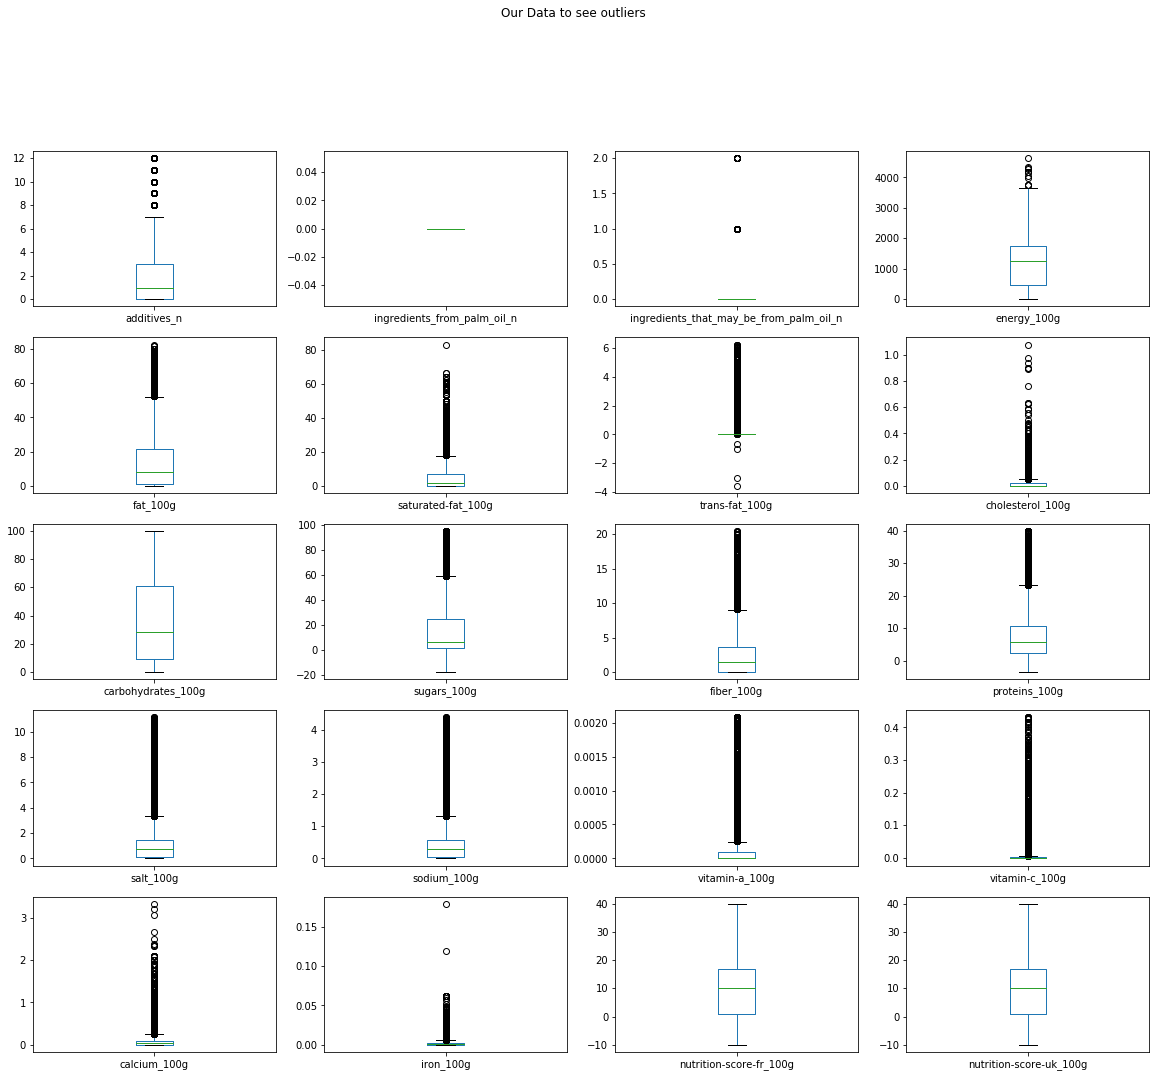

In [22]:
df_US.select_dtypes(include=float).plot(kind='box', subplots=True, title='Our Data to see outliers', figsize=(20,20), layout=(6,4))

plt.show()

In [23]:
from pandas import Series
# We split all entries in the 'additives_en' column and create a new row for each in one new dataframe
exp_additives = df_US['additives_en'].str.split(',').apply(Series, 1).stack()
exp_additives.index = exp_additives.index.droplevel(-1)
exp_additives.name = 'additives_exp'
data_exp_additives = df_US.join(exp_additives)

In [24]:
# We split all entries in the 'ingredients_text' column and create a new row for each in one new dataframe
exp_ingredients = df_US['ingredients_text'].str.split(',').apply(Series, 1).stack()
exp_ingredients.index = exp_ingredients.index.droplevel(-1)
exp_ingredients.name = 'ingredients_exp'
data_exp_ingredients = df_US.join(exp_ingredients)

In [25]:
# We split all entries in the 'categories_en' column and create a new row for each in one new dataframe
# We use the 'categories_en' column rather than th 'main_column' because there are many NaNs and this way we get more data
exp_categories = df_US['categories_en'].str.split(',').apply(Series, 1).stack()
exp_categories.index = exp_categories.index.droplevel(-1)
exp_categories.name = 'categories_exp'
data_exp_categories = df_US.join(exp_categories)

In [26]:
# We split all entries in the 'countries_en' column and create a new row for each in one new dataframe
exp_countries = df_US['countries_en'].str.split(',').apply(Series, 1).stack()
exp_countries.index = exp_countries.index.droplevel(-1)
exp_countries.name = 'countries_exp'
data_exp_countries = df_US.join(exp_countries)

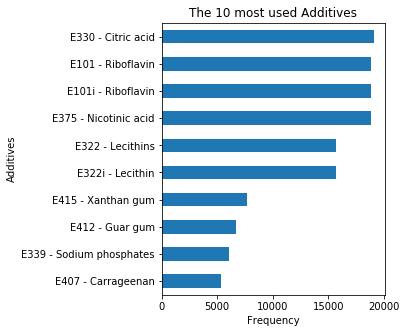

In [27]:

data_exp_additives['additives_exp'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(4,5))
plt.xlabel('Frequency')
plt.ylabel('Additives')
plt.title('The 10 most used Additives')

plt.show()

### Data Exploratory Analysis

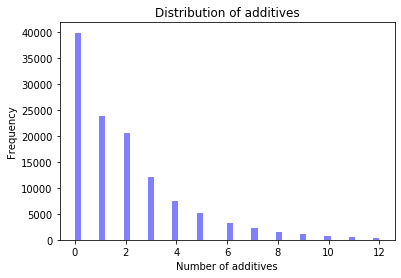

In [28]:
x = df_US['additives_n']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of additives')
plt.xlabel('Number of additives')
plt.ylabel('Frequency')
plt.show()

We see that for most numbers of products there are no additives

**Is there a difference in nutritions in Vegan / not-Vegan products?**

In [15]:
from pandas.plotting import scatter_matrix

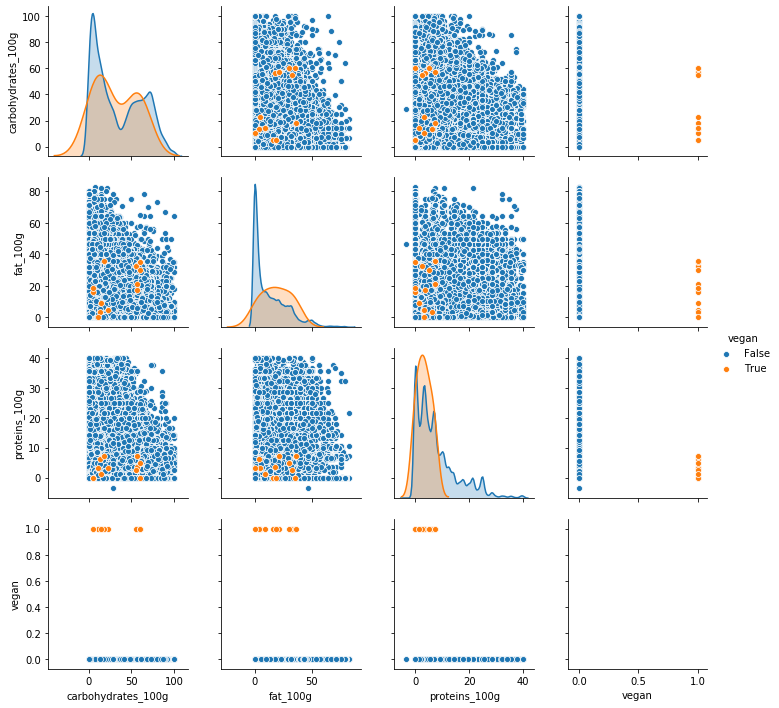

In [16]:
food_nutrients = no_null_objects(df_US[["carbohydrates_100g", "fat_100g", "proteins_100g", "ingredients_text"]])
food_nutrients["vegan"] = food_nutrients["ingredients_text"].str.contains("Vegan")
sns.pairplot(food_nutrients, hue="vegan", diag_kind="kde")

We see in above distribution chart that, the distributions are quite similar for products with "Vegan" label. But in scatters there are some areas where there are no vegan products.

Now, we want to check how nay products with additives added over time.

In [17]:
from datetime import datetime

In [18]:
df_US["datetime"] = df_US["created_datetime"].apply(str).apply(lambda x: x[:x.find("T")])
min_date = datetime.strptime(df_US["datetime"].min(), "%Y-%m-%d")

In [19]:
def apply_func(x):
    try:
        return (datetime.strptime(x, "%Y-%m-%d") - min_date).days
    except:
        return None
df_US["exists_days"] = df_US["datetime"].apply(apply_func)

Text(0, 0.5, 'number of additives')

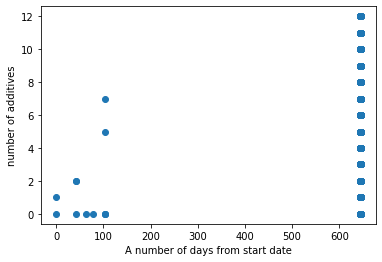

In [20]:
plt.scatter(df_US["exists_days"], df_US["additives_n"])
plt.xlabel("A number of days from start date")
plt.ylabel("number of additives")


- Vegan products do not much differ from other products
- The number of additives in products raises over time

### Categorization of Products

We want to check the brands represented in this dataset for United States

In [21]:
brands= df_US['brands'].value_counts().head(10).to_frame()
k = brands.style.background_gradient(cmap='Greens')
k

,brands
Meijer,1440
Kroger,1235
Great Value,1017
Spartan,1016
Ahold,988
Roundy's,912
Weis,814
Target Stores,794
Shoprite,718
Harris Teeter,614


Text(0.5, 0, 'Frequency')

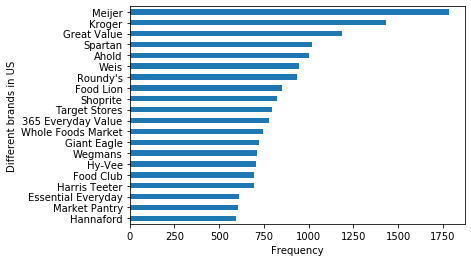

In [31]:
food_countries = splitDataFrameList(no_null_objects(df_US, ["brands"]), "brands", ",")
countries = food_countries["brands"].value_counts()
countries[:20][::-1].plot.barh()
plt.ylabel("Different brands in US")
plt.xlabel("Frequency")

We want to run categorization and product clustering for a subset of data. 'Food Lion' supermarket is chosen for further analysis in this study: What do they have in their shelves?

**Analysis of the brand: Food Lion**

In [23]:
df_US_Lion=df_US[df_US['brands']=='Food Lion']

Let's fill the remaining NaN values with 0

In [24]:
df_US_Lion=df_US_Lion.fillna(0, axis=1)

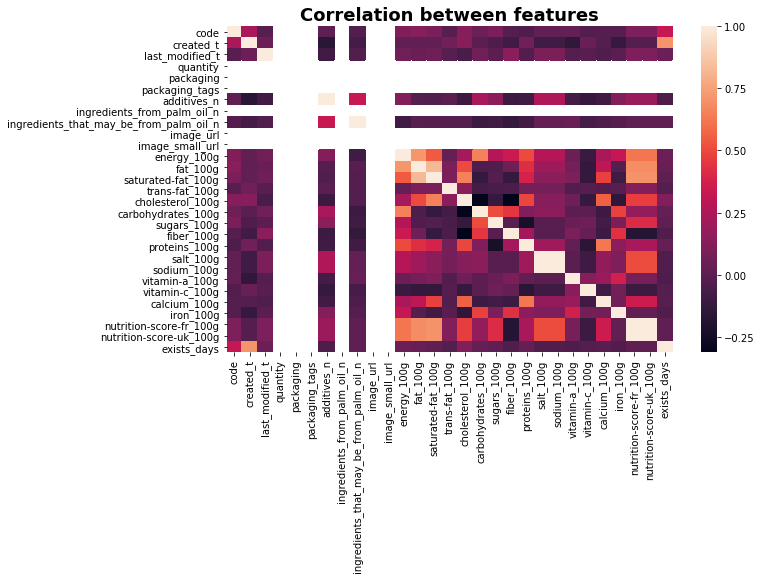

In [25]:
ac_corr=df_US_Lion.corr()
f,ax=plt.subplots(figsize=(10,6))
sns.heatmap(ac_corr)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.show()

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [28]:
print('The top 5 Correlations between variables are: \n{}'.format(get_top_abs_correlations(df_US_Lion.select_dtypes(include=float), n=10)))

The top 5 Correlations between variables are: 
salt_100g                sodium_100g                1.000000
nutrition-score-fr_100g  nutrition-score-uk_100g    1.000000
fat_100g                 saturated-fat_100g         0.830689
energy_100g              fat_100g                   0.713138
saturated-fat_100g       nutrition-score-uk_100g    0.705141
                         nutrition-score-fr_100g    0.705141
fat_100g                 nutrition-score-fr_100g    0.688213
                         nutrition-score-uk_100g    0.688213
saturated-fat_100g       cholesterol_100g           0.653223
energy_100g              carbohydrates_100g         0.652801
dtype: float64


From the correlation heatmap we can see a strong correlation between many features:
- Sugars and carbohydrates.
- Fat and saturated fat and energy
- Carbohydrates and energy
- Vitamin C and calcium
- Vitamin C and Vitamin a

Note: most of the above corelations are intuitive and obvious, hence does not provide much insight.

However, finally a strong correlation between the nutrition score (FR and UK) and sugars, fat, saturated fat and energy, which means that the scores are given based on the amounts of fat, calories and carbs in the product. Let's check the type of relation between the nutrition score and calories:

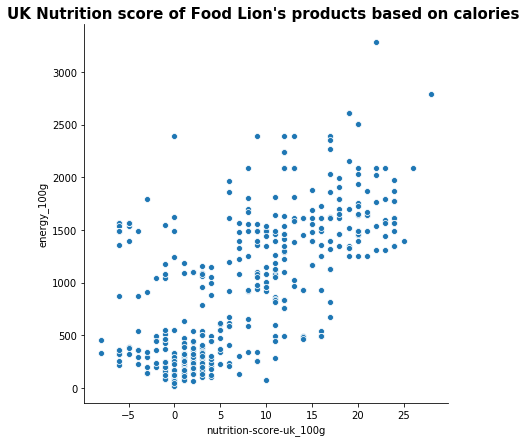

In [29]:
sns.relplot(x='nutrition-score-uk_100g', y='energy_100g', height=6,data=df_US_Lion, palette='ch:.25')
plt.title("UK Nutrition score of Food Lion's products based on calories ", 
          weight='bold', 
          fontsize=15)
plt.show()

Overall, We can see a pattern in this scatter plot, the more energy the product has, the higher score it gets. Hoewever, many high calories products have a 0 nutrition score.

We want to keep 7 important nutrients in our subset for categorization of products

In [30]:
df_US_Lion_7 = df_US_Lion[['product_name','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g']]
print( "we have ",df_US_Lion_7.shape[0], "products in Food Lion supermarkets and ", df_US_Lion_7.shape[1], "features")

we have  496 products in Food Lion supermarkets and  7 features


#### Feature engineering

We will create new columns to label calories, fat, carbs and proteins, that will be used later in our meal plan choices. Let's create functions for our new label columns (calories, carbs, fat, calories) where we categorise them into: low, medium and high.

Let's check the distribution of nutrients to determine the range

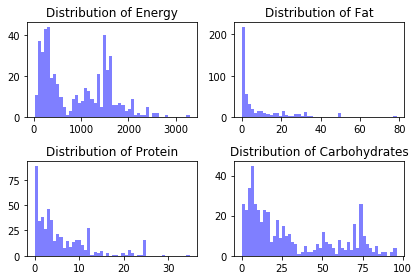

In [31]:
x1 = df_US_Lion_7['energy_100g']
x2 = df_US_Lion_7['fat_100g']
x3 = df_US_Lion_7['proteins_100g']
x4 = df_US_Lion_7['carbohydrates_100g']
num_bins = 50
fig, axs = plt.subplots(nrows=2, ncols=2,tight_layout=True)
axs[0][0].hist(x1, num_bins, facecolor='blue', alpha=0.5)
axs[0][0].title.set_text('Distribution of Energy')
axs[0][1].hist(x2, num_bins, facecolor='blue', alpha=0.5)
axs[0][1].title.set_text('Distribution of Fat')
axs[1][0].hist(x3, num_bins, facecolor='blue', alpha=0.5)
axs[1][0].title.set_text('Distribution of Protein')
axs[1][1].hist(x4, num_bins, facecolor='blue', alpha=0.5)
axs[1][1].title.set_text('Distribution of Carbohydrates')
# plt.title('Distribution of carbohydrates_100g')
plt.show()

After careful observations of distribution carbs and refering to serving guidelines https://health.gov/dietaryguidelines/2015/guidelines/appendix-2/, we decided following ranges for feature engineered columns.

- For Calories- low : <250 medium: 250- 500 high : >500
- For Fat - low : <10 medium: 10- 20 high : >20
- For protein - low : <10 medium: 10- 20 high : >20
- For Carb - low : <4 medium: 4- 12 high : >12

In [32]:
def label_cal (row):
   if row['energy_100g'] < 250  :
      return 'low'
   if row['energy_100g'] > 250 and row['energy_100g'] < 500 :
      return 'medium'
   if row['energy_100g'] > 500 :
      return 'high'
   
   return 'Other'


def label_fat (row):
   if row['fat_100g'] < 10 :
      return 'low'
   if row['fat_100g'] >= 10 and row['fat_100g'] < 20 :
      return 'medium'
   if row['fat_100g'] >= 20 :
      return 'high'
   
   return 'Other'


def label_pro (row):
   if row['proteins_100g'] < 10 :
      return 'low'
   if row['proteins_100g'] >= 10 and row['proteins_100g'] < 20 :
      return 'medium'
   if row['proteins_100g'] >= 20 :
      return 'high'
   
   return 'Other'


def label_carb (row):
   if row['carbohydrates_100g'] < 4 :
      return 'low'
   if row['carbohydrates_100g'] >= 4 and row['carbohydrates_100g'] < 12 :
      return 'medium'
   if row['carbohydrates_100g'] >= 12 :
      return 'high'
   
   return 'Other'

In [33]:
df_US_Lion_7['calories'] = df_US_Lion_7.apply (lambda row: label_cal(row), axis=1)

df_US_Lion_7['fat'] = df_US_Lion_7.apply (lambda row: label_fat(row), axis=1)

df_US_Lion_7['protein'] = df_US_Lion_7.apply (lambda row: label_pro(row), axis=1)

df_US_Lion_7['carbs'] = df_US_Lion_7.apply (lambda row: label_carb(row), axis=1)

In [34]:
df_US_Lion_7.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,calories,fat,protein,carbs
30532,Yellow Cling Sliced Peaches In Light Syrup,234.0,0.00,0.00,13.49,10.32,0.00,low,low,low,high
30533,Luncheon Meat,1343.0,28.57,10.71,1.79,1.79,12.50,high,high,medium,low
30540,Classic Condensed Chicken With Rice Soup,205.0,1.22,0.00,8.94,0.00,1.63,low,low,low,medium
30541,"Condensed Cream Of Chicken Soup, Classic",305.0,4.88,1.22,5.69,0.81,2.44,medium,low,low,medium
30542,Condensed Vegetable With Beef Stock Soup,339.0,0.41,0.00,16.26,4.88,3.25,medium,low,low,high


In [35]:
db=df_US_Lion_7.calories.value_counts().reset_index()
dd= df_US_Lion_7.fat.value_counts().reset_index()
de=df_US_Lion_7.protein.value_counts().reset_index()
dg=df_US_Lion_7['carbs'].value_counts().reset_index()

In [36]:
#Merge them on the 'index' column:
merged=db.merge(dd,on='index').merge(de, on='index').merge(dg, on='index')
mergedstyle = merged.style.background_gradient(cmap='Oranges')
mergedstyle

,index,calories,fat,protein,carbs
0,high,279,82,32,315
1,medium,109,53,76,130
2,low,108,361,388,51


Our products are now divided into 3 categories which helps in choosing mean plan based on nutrition requirements.

Low Calorie Products:


In [37]:
calorie_low=df_US_Lion_7.loc[df_US_Lion_7['calories']=='low']
calorie_low.sample(10)

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,calories,fat,protein,carbs
30673,Sliced White Potatoes,188.0,0.00,0.00,10.97,0.65,0.65,low,low,low,medium
31445,1% Lowfat Milk,192.0,1.04,0.62,5.42,5.00,3.33,low,low,low,medium
30947,Gelatin Dessert Cups,21.0,0.00,0.00,0.00,0.00,1.01,low,low,low,low
30702,Picante Sauce,134.0,0.00,0.00,6.45,3.23,0.00,low,low,low,medium
30548,Cut Leaf Spinach,151.0,0.00,0.00,3.61,1.20,2.41,low,low,low,low
30633,Sliced Mushrooms,130.0,0.00,0.00,5.38,0.00,1.54,low,low,low,medium
31675,Classic Condensed Chicken Noodle Soup,238.0,1.63,0.41,7.32,0.00,2.44,low,low,low,medium
30672,Sliced Carrots,105.0,0.00,0.00,5.00,3.33,0.83,low,low,low,medium
31183,Chicken Noodles Soup,172.0,0.82,0.20,4.90,0.41,2.45,low,low,low,medium
31941,"Tomato Sauce, No Salt Added",138.0,0.00,0.00,6.56,3.28,1.64,low,low,low,medium


Medium Calorie Products:


In [38]:
calorie_medium = df_US_Lion_7.loc[df_US_Lion_7['calories']=='medium']
calorie_medium.sample(10)

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,calories,fat,protein,carbs
30811,Yellow Cling Diced Peaches In Naturally Flavor...,297.0,0.00,0.00,16.81,13.27,0.88,medium,low,low,high
31040,Three Cheese Pasta Sauce,264.0,1.19,0.40,11.11,7.94,1.59,medium,low,low,medium
30649,Pinto Beans,322.0,0.38,0.00,14.62,0.77,4.62,medium,low,low,high
30622,Corn On The Cob,444.0,1.18,0.00,22.35,5.88,3.53,medium,low,low,high
30856,Halved Pears In Light Syrup,259.0,0.00,0.00,14.62,11.54,0.00,medium,low,low,high
30780,Chicken Breast With Rib Meat In Water,335.0,1.79,0.00,0.00,0.00,16.07,medium,low,medium,low
30983,Fruit Cocktail In Heavy Syrup,326.0,0.00,0.00,19.53,14.06,0.00,medium,low,low,high
30826,"Cocktail Sauce With Horseradish, Bold & Spicy",485.0,0.00,0.00,24.64,18.84,1.45,medium,low,low,high
31114,Chunky Baked Potatoes With Cheddar & Bacon,326.0,3.27,0.82,10.20,0.82,2.45,medium,low,low,medium
31903,Pie Filling & Topping,444.0,0.00,0.00,25.88,20.00,0.00,medium,low,low,high


High Calorie Products:


In [39]:
calorie_high = df_US_Lion_7.loc[df_US_Lion_7['calories']=='high']
calorie_high.sample(10)

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,calories,fat,protein,carbs
30953,Toasted Rice Cereal,1619.0,0.00,0.00,87.10,6.45,6.45,high,low,low,high
30858,Cocktail Sauce With Horseradish,544.0,0.00,0.00,28.99,23.19,1.45,high,low,low,high
30564,"Instant Pudding & Pie Filling, Vanilla",1611.0,0.00,0.00,96.15,80.77,0.00,high,low,low,high
30821,Sharp Cheddar Cheese,1644.0,32.14,21.43,0.00,0.00,25.00,high,high,high,low
31035,"Snack Slices, Sharp Cheddar Cheese",1644.0,32.14,21.43,0.00,0.00,25.00,high,high,high,low
30887,Sugar Free Coffee Creamer,2510.0,50.00,30.00,40.00,0.00,0.00,high,high,low,high
31692,Creamy Frosting,1774.0,18.18,9.09,66.67,57.58,0.00,high,medium,low,high
31255,"Classic Spaghetti, Enriched Macaroni Product",1494.0,1.79,0.00,73.21,3.57,12.50,high,low,medium,high
31176,Whipped Cream Cheese Spread,1464.0,35.00,22.50,5.00,5.00,5.00,high,high,low,medium
30903,"Mashed Potatoes, Garlic",506.0,4.84,2.02,16.94,0.81,2.42,high,low,low,high


View Product Samples

### Word Clouds for different categories

In [42]:
# pip install wordcloud

In [40]:
from wordcloud import WordCloud

In [41]:
wordcloud1 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(calorie_low['product_name']))
WordCloud.generate_from_frequencies

<function wordcloud.wordcloud.WordCloud.generate_from_frequencies(self, frequencies, max_font_size=None)>

In [42]:
wordcloud2 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(calorie_medium['product_name']))
WordCloud.generate_from_frequencies

<function wordcloud.wordcloud.WordCloud.generate_from_frequencies(self, frequencies, max_font_size=None)>

In [43]:
wordcloud3 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(calorie_high['product_name']))
WordCloud.generate_from_frequencies

<function wordcloud.wordcloud.WordCloud.generate_from_frequencies(self, frequencies, max_font_size=None)>

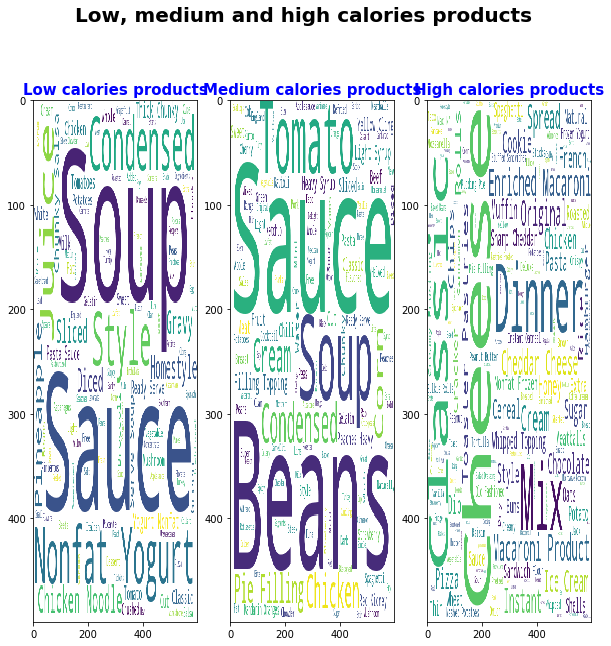

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))

fig.suptitle('Low, medium and high calories products', weight='bold', fontsize=20)



ax1.set_title('Low calories products', weight='bold', fontsize=15, color='b')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(wordcloud1, aspect='auto')


ax2.set_title('Medium calories products', weight='bold', fontsize=15, color='b')
im4 = ax2.imshow(wordcloud2, aspect='auto')

ax3.set_title('High calories products', weight='bold', fontsize=15, color='b')
im4 = ax3.imshow(wordcloud3, aspect='auto')

# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

### Clustering

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [48]:
df_US_Lion_7.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,912.806452,8.150101,3.218327,30.249597,9.916956,5.994940
std,673.036414,12.300915,5.826161,27.102660,13.764805,6.367587
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,289.000000,0.000000,0.000000,7.320000,1.470000,1.450000
50%,837.000000,1.790000,0.000000,19.375000,4.195000,3.530000
75%,1494.000000,11.545000,3.702500,52.842500,13.075000,9.142500
max,3289.000000,78.570000,38.890000,96.150000,80.770000,34.780000


In [49]:
df_US_Lion_7.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,calories,fat,protein,carbs
30532,Yellow Cling Sliced Peaches In Light Syrup,234.0,0.00,0.00,13.49,10.32,0.00,low,low,low,high
30533,Luncheon Meat,1343.0,28.57,10.71,1.79,1.79,12.50,high,high,medium,low
30540,Classic Condensed Chicken With Rice Soup,205.0,1.22,0.00,8.94,0.00,1.63,low,low,low,medium
30541,"Condensed Cream Of Chicken Soup, Classic",305.0,4.88,1.22,5.69,0.81,2.44,medium,low,low,medium
30542,Condensed Vegetable With Beef Stock Soup,339.0,0.41,0.00,16.26,4.88,3.25,medium,low,low,high


In [50]:
X = df_US_Lion_7[['energy_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g']]
y = df_US_Lion_7[['calories']]
y.head()

,calories
30532,low
30533,high
30540,low
30541,medium
30542,medium


In [51]:
ys = y.iloc[:,0]
ys.head()

30532       low
30533      high
30540       low
30541    medium
30542    medium
Name: calories, dtype: object

#### K-means Clustering

In [52]:
X_std = StandardScaler().fit_transform(X)
X_std_df = pd.DataFrame(X_std)
#perform Clustering
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X_std_df)
y_kmeans = kmeans.predict(X_std_df)


In [53]:
#kmeans_df = pd.DataFrame({'Clusters':y_kmeans})
#df_clusters = pd.concat([df_US_Lion_7, kmeans_df], axis= 1)
df_US_Lion_7['Clusters'] = y_kmeans
#df_US_Lion_7

In [54]:
df_clusters = df_US_Lion_7.groupby('Clusters').mean()
df_clusters

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
Clusters,,,,,,
0,322.111111,1.613651,0.511587,12.686944,6.848095,2.712421
1,1685.432432,32.053784,14.500000,8.362703,2.609730,21.853784
2,1391.102564,6.408034,1.456154,59.099744,5.308291,9.792991
3,1661.868421,30.830000,14.629474,24.742368,7.535789,3.220263
4,1602.096154,10.164231,3.934231,70.045962,42.098077,4.100385


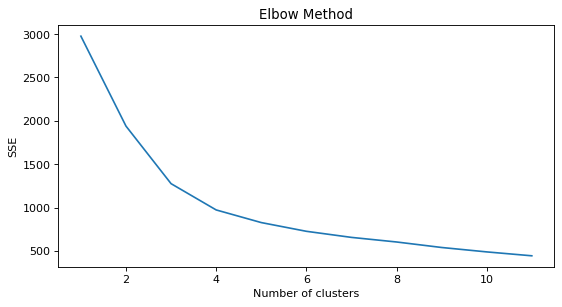

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
sse = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std_df)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 12), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Cluster-3 is least energy food. Cluster-4 is high in energy, high in fat and Saturated fat, but low in carb, sugar and proteins. Cluster-2 medium in enegry, medium in fat , but very low in sugar.

### PCA

([<matplotlib.axis.XTick at 0x1c76b701e48>,
 <a list of 6 Text xticklabel objects>)

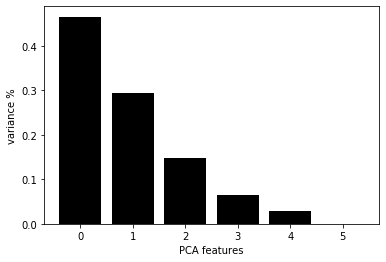

In [56]:
# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [57]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


principalDf.head()

,principal component 1,principal component 2,principal component 3
0,-1.651104,-0.181014,0.526597
1,1.981494,-1.771431,0.281790
2,-1.613090,-0.817363,0.088466
3,-1.245064,-0.967566,0.220620
4,-1.360266,-0.407916,-0.035606


In [58]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.46506355 0.29318371 0.14737619]


In [59]:
principalDf['calories'] = pd.Series(y['calories'].values)
principalDf.head()

,principal component 1,principal component 2,principal component 3,calories
0,-1.651104,-0.181014,0.526597,low
1,1.981494,-1.771431,0.281790,high
2,-1.613090,-0.817363,0.088466,low
3,-1.245064,-0.967566,0.220620,medium
4,-1.360266,-0.407916,-0.035606,medium


In [60]:
label_dict = {1: 'low',
              2: 'medium',
              3: 'high'}

feature_dict = {0: 'energy_100g',
                1: 'fat_100g',
                2: 'saturated-fat_100g',
                3: 'carbohydrates_100g',
               4: 'sugars_100g',
               5: 'proteins_100g'}


In [61]:
#finalDf.head()

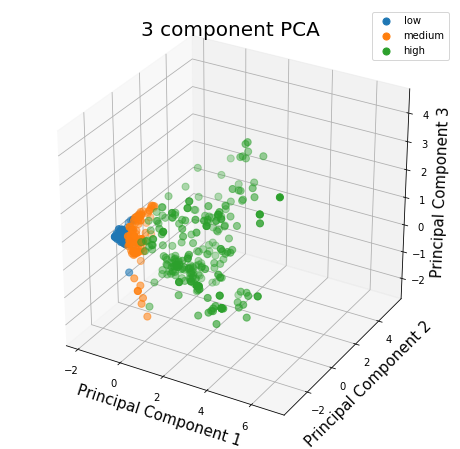

In [64]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = list(label_dict.values())

for target in targets:
    indicesToKeep = principalDf['calories'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'],
               principalDf.loc[indicesToKeep, 'principal component 3']
               , s = 50)
ax.legend(targets)
ax.grid()

#### Hierarchical Clustering

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func='deprecated')
pred_ag = agc.fit_predict(X)
df_US_Lion_7['ag_cluster']= agc.fit_predict(X)

In [75]:
df_clusters = df_US_Lion_7.groupby('ag_cluster').mean()
df_clusters

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,Clusters
ag_cluster,,,,,,,
0,292.870293,1.016778,0.276569,12.329079,6.631213,2.636778,0.000000
1,1513.328244,11.536794,5.452443,54.074809,13.490305,10.699618,2.396947
2,1037.466667,10.054667,4.666267,31.510667,9.344933,7.100400,1.893333
3,2492.266667,48.899333,12.724000,29.119333,4.780667,12.376000,1.933333
4,1925.444444,22.236944,7.641389,60.368333,22.059444,6.207778,3.000000


Cluster-0 is least energy food. Cluster-3 is high in energy, high in fat and Saturated fat, but low in carb, sugar and proteins. Cluster-2 medium in enegry, medium in fat , but very low in sugar. Cluster 4 is high carb and high protein, high sugar but low fat.

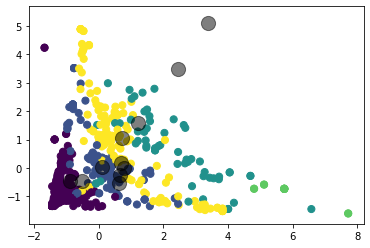

In [62]:
plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], c=pred_ag, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [66]:
#df_US_Lion_7.head()

In [67]:
import pandas_profiling

In [68]:
#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="output.html")

### Predicting Nutrition Score with Linear Regression

For this analysis, we will take US data.

In [77]:
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [78]:
#df_US['nutrition-score-fr_100g'].dropna()
df_US_sub = df_US[np.isfinite(df_US['nutrition-score-fr_100g'])]

In [79]:
#df_US_sub.to_csv("Sub_1.csv")

In [80]:
X= df_US_sub[['additives_n','calcium_100g', 'carbohydrates_100g', 'cholesterol_100g',
       'energy_100g', 'fat_100g', 'fiber_100g', 'ingredients_from_palm_oil_n', 
       'ingredients_that_may_be_from_palm_oil_n', 'iron_100g',
       'proteins_100g', 'salt_100g', 'saturated-fat_100g',
        'sodium_100g','sugars_100g', 'trans-fat_100g', 
       'vitamin-a_100g', 'vitamin-c_100g','exists_days']]

In [81]:
X.fillna(0,  inplace = True)
#X

In [82]:
#X.to_csv("df_sub1.csv")

In [83]:
y = df_US_sub[[ 'nutrition_grade_fr']]
y1 = df_US_sub[['nutrition-score-fr_100g']]
y1 = df_US_sub[['nutrition-score-uk_100g']]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1)

In [85]:
# Linear regression
# Create linear regression object
regr = linear_model.LinearRegression()

In [86]:
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [87]:
#Report MSE for the classifier
print("MSE: %.2f" % np.mean((y_pred - y_test) ** 2))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = regr.score(X_test,y_test)
print("R squared:",  metrics.r2_score(y_test, y_pred))
print("accuracy: ",accuracy*100,'%')

MSE: 10.60
2.4895846207690067
10.595706737999006
3.255104719974306
R squared: 0.8707581670099364
accuracy:  87.07581670099363 %


In [88]:
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
df1 = df.head(25)
df1

,Actual,Predicted
0,nutrition-score-uk_100g 170281 ...,"[[2.4929460062097712], [13.326472570379138], [..."


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
Actual       1 non-null object
Predicted    1 non-null object
dtypes: object(2)
memory usage: 144.0+ bytes


### Predicting Nutrition Grade with Classification

**Run Naive Bayes**

In [89]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
X= df_US_sub[['additives_n','calcium_100g', 'carbohydrates_100g', 'cholesterol_100g',
       'energy_100g', 'fat_100g', 'fiber_100g', 'ingredients_from_palm_oil_n', 
       'ingredients_that_may_be_from_palm_oil_n', 'iron_100g',
       'proteins_100g', 'salt_100g', 'saturated-fat_100g',
        'sodium_100g','sugars_100g', 'trans-fat_100g', 
       'vitamin-a_100g', 'vitamin-c_100g','exists_days']]

In [91]:
X.fillna(0,  inplace = True)

In [92]:
y = df_US_sub[[ 'nutrition_grade_fr']]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
nb = BernoulliNB()
#fit your classifier to training set
nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [95]:
y_pred =  nb.predict(X_test)

In [96]:
#compare y_pred with actual targets for your test set(y_test) and calculate precision, recall, f1-score
print("Naive-Bayes Classifier")
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall: %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score: %0.2f" %f1_score(y_test, y_pred , average="macro"))

#compute recall and f1-score

Naive-Bayes Classifier
Accuracy: 0.43
Precision: 0.41
Recall: 0.43
F1-score: 0.41


In [97]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2218  536  359  350  379]
 [ 934 1064  573  534  673]
 [ 885  848  899 1323  866]
 [ 312  445  793 3092 1990]
 [  44   56  153 1511 2962]]
              precision    recall  f1-score   support

           a       0.50      0.58      0.54      3842
           b       0.36      0.28      0.32      3778
           c       0.32      0.19      0.24      4821
           d       0.45      0.47      0.46      6632
           e       0.43      0.63      0.51      4726

   micro avg       0.43      0.43      0.43     23799
   macro avg       0.41      0.43      0.41     23799
weighted avg       0.42      0.43      0.41     23799



**Run Decision Tree**

In [98]:
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Decision Tree Classifier


In [99]:
#y-pred - same as above
y_pred = clf.predict(X_test)
print("Decision Tree Classifier")
#compute precision,f1-score, recall - same as above
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall: %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score: %0.2f" %f1_score(y_test, y_pred , average="macro"))

Decision Tree Classifier
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1-score: 0.95


In [100]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3701  134    7    0    0]
 [ 116 3489  161    5    7]
 [  10  187 4474  150    0]
 [   0    2  167 6288  175]
 [   0    3    1  127 4595]]
              precision    recall  f1-score   support

           a       0.97      0.96      0.97      3842
           b       0.91      0.92      0.92      3778
           c       0.93      0.93      0.93      4821
           d       0.96      0.95      0.95      6632
           e       0.96      0.97      0.97      4726

   micro avg       0.95      0.95      0.95     23799
   macro avg       0.95      0.95      0.95     23799
weighted avg       0.95      0.95      0.95     23799



**Run GBM**

In [101]:
gbm0 = GradientBoostingClassifier(random_state=10)

In [102]:
gbm0 = gbm0.fit(X_train, y_train)

In [103]:
y_pred =  gbm0.predict(X_test)

In [104]:
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall: %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score: %0.2f" %f1_score(y_test, y_pred , average="macro"))

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-score: 0.91


In [105]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3573  215   54    0    0]
 [ 136 3271  371    0    0]
 [  18  281 4109  413    0]
 [   0    3  277 6262   90]
 [   0   10    0  208 4508]]
              precision    recall  f1-score   support

           a       0.96      0.93      0.94      3842
           b       0.87      0.87      0.87      3778
           c       0.85      0.85      0.85      4821
           d       0.91      0.94      0.93      6632
           e       0.98      0.95      0.97      4726

   micro avg       0.91      0.91      0.91     23799
   macro avg       0.91      0.91      0.91     23799
weighted avg       0.91      0.91      0.91     23799



Decision Tree returned best result with 95 % accuracy. In next steps we will check feature imortance with RandomForest Classifier.

### Feature Importance for determining Nutrition Grade 

In [106]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000,n_features=10,n_informative=3,n_redundant=0,n_repeated=0, n_classes=2,random_state=0,shuffle=False)


In [107]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_

In [108]:
rf = clf.fit(X_train, y_train)
y_pred =  rf.predict(X_test)

In [109]:
print("Accuracy: %0.2f" %accuracy_score(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall: %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score: %0.2f" %f1_score(y_test, y_pred , average="macro"))

Accuracy: 0.95
Precision: 0.95
Recall: 0.94
F1-score: 0.94


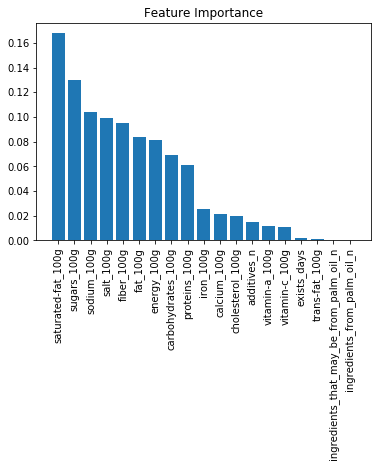

In [110]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns.values[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

From the graph above, we can check what factors contribute most to nutrition grade.Feature importance order is:
- saturated fat
- suger
- salt
- sodium
- fiber
- energy
- fat
- carb
- protein



## Daily intakes analysis

For daily intake analysis, we have collected daily intake limit data from other source https://en.wikipedia.org/wiki/Reference_Daily_Intake

In [142]:
data_rec = pd.DataFrame({'nutrient': ['fat','satuared-fat','carb','sugar','fiber','proein','sodium','potassium', 'vit-c', 'vit-a','calcium', 'iron', 'Cholesterol'],
                         'qty_grm': [78, 20, 275, 50, 28, 50, 2.3, 4.7, 0.06, 0.0009, 1.3, 0.018, 0.3]})
data_rec.head(3)                        

,nutrient,qty_grm
0,fat,78.0
1,satuared-fat,20.0
2,carb,275.0


In [162]:
#data_rec[data_rec['nutrient']== 'sodium'].values
sodium_limit = data_rec.iloc[6].values[1]

view products high in sodium, to be avoided by people with high blood pressure.

In [167]:
Food_lion_high_sodium = df_US_Lion[df_US_Lion["sodium_100g"]>sodium_limit]
Food_lion_high_sodium[['product_name','sodium_100g', 'serving_size']]

,product_name,sodium_100g,serving_size
30570,Dry Taco Seasoning Mix,7.167,6 g (2 tsp)
30629,Spanish Olives,2.333,15 g (15 g)
30630,Spanish Olives,2.375,16 g (2 Tbsp)
30782,"Bouillon Cubes, Beef",19.750,4 g (4 g)
30783,"Bouillon Cubes, Chicken",22.500,4 g (4 g)
30869,Baking Soda,26.667,0.6 g (0.125 tsp)
30909,Seasoned Salt,31.667,1.2 g (0.25 tsp)
30932,Real Bacon Bits,2.714,7 g (1 Tbsp)
30933,Bacon Pieces,2.714,7 g (1 Tbsp)
31029,Pure Baking Powder,10.833,0.6 g (0.125 tsp)


In [161]:
df_clusters = df_US_Lion_7.groupby('ag_cluster').mean().reset_index()
df_clusters

,ag_cluster,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,Clusters
0,0,268.064615,1.027662,0.243231,13.258862,7.231754,1.979262,0.030769
1,1,1042.536364,7.713636,3.408727,36.299273,16.577909,6.945091,1.481818
2,2,2079.983607,28.948033,8.695082,45.745410,15.411803,9.478361,2.262295
3,3,3448.153846,93.406154,18.683846,0.000000,0.000000,0.000000,4.000000
4,4,1507.236686,10.842071,4.710710,55.274675,20.251834,9.503609,2.029586


Word cloud of products for different clusters

In [169]:
cluster_0 = df_US_Lion_7.loc[df_US_Lion_7['ag_cluster']==0] ## Low enrgy, medium sugar
cluster_1 = df_US_Lion_7.loc[df_US_Lion_7['ag_cluster']==1] ## medium energy, high protein, low fat , high suger
cluster_2 = df_US_Lion_7.loc[df_US_Lion_7['ag_cluster']==2] ## High Carb, high protein
cluster_3 = df_US_Lion_7.loc[df_US_Lion_7['ag_cluster']==3] ## High in energy, low suger, low protein, high fat
cluster_4 = df_US_Lion_7.loc[df_US_Lion_7['ag_cluster']==4] ## High Carb, high protein

**Cluster results**

- cluster_0 : Low enrgy, medium sugar
- cluster_1 : medium energy, high protein, low fat , high suger
- cluster_2 : High Carb, high protein
- cluster_3 : High in energy, low suger, low protein, high fat
- cluster_4 : High Carb, high protein

In [170]:
wordcloud0 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(cluster_0['product_name']))
WordCloud.generate_from_frequencies
wordcloud1 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(cluster_1['product_name']))
WordCloud.generate_from_frequencies
wordcloud2 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(cluster_2['product_name']))
WordCloud.generate_from_frequencies
wordcloud3 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(cluster_3['product_name']))
WordCloud.generate_from_frequencies
wordcloud4 = WordCloud(width=600, height=500, background_color='white').generate(' '.join(cluster_4['product_name']))
WordCloud.generate_from_frequencies

<function wordcloud.wordcloud.WordCloud.generate_from_frequencies(self, frequencies, max_font_size=None)>

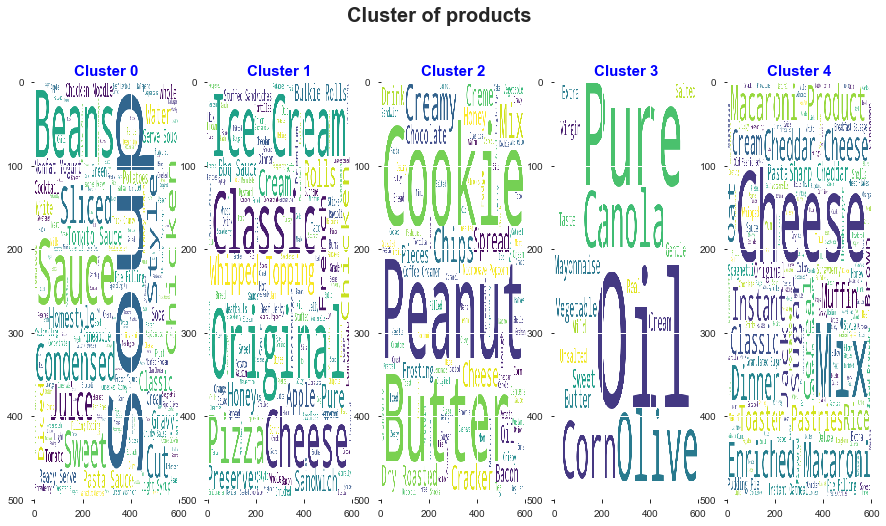

In [172]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,8))

fig.suptitle('Cluster of products', weight='bold', fontsize=20)

ax1.set_title('Cluster 0', weight='bold', fontsize=15, color='b')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im1 = ax1.imshow(wordcloud0, aspect='auto')

ax2.set_title('Cluster 1', weight='bold', fontsize=15, color='b')
im2 = ax2.imshow(wordcloud1, aspect='auto')

ax3.set_title('Cluster 2', weight='bold', fontsize=15, color='b')
im3 = ax3.imshow(wordcloud2, aspect='auto')

ax4.set_title('Cluster 3', weight='bold', fontsize=15, color='b')
im4 = ax4.imshow(wordcloud3, aspect='auto')

ax5.set_title('Cluster 4', weight='bold', fontsize=15, color='b')
im5 = ax5.imshow(wordcloud4, aspect='auto')

# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

### Results and Discussion

- We have found that there are very less vegan products added in the dataset. Hoever, in terms of butritional value, vegan products do not differe much from non-vegan products.
- Food with Additives are added recently. The foods added earlier contains less additives.
- As per hierarchical cluster results, Cluster 1 above is low curb, low suger products such as, Soup, Beans, Chicken, Juice etc.
- Baking Soda, Taco Seasoning mix contain high amount of salt which should be avoided or consumed in less quanity by high blood pressure patients.


### Conclusion
This project is very powerful in providing useful recommendation for healthier dietary alternatives. The comprehensive sampling and granularity of collection provides power for revealing relationship between nutritional quality and marketing of branded food and nutrition benefits.

## Future analysis Plan

1. Imputing missing values for packaging, additives using prediction technique
2. Text analysis of quanity and serving size texts, converting those to quantifiable features, and including those in our analysis.